In [72]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                
    validation_split=0.2,          
    rotation_range=30,             
    width_shift_range=0.1,         
    height_shift_range=0.1,        
    shear_range=0.1,                        
    horizontal_flip=True,             
)

val_datagen = ImageDataGenerator(
    rescale=1./255,                
    validation_split=0.2          
)

train = train_datagen.flow_from_directory(
    'dataset',
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
)
val = val_datagen.flow_from_directory(
    'dataset',
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation'
)

Found 208 images belonging to 2 classes.


Found 52 images belonging to 2 classes.


In [74]:
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\kodya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [76]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 255, 255, 32)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 126, 126, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 62, 62, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │    31,490,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,564,641 (120.41 MB)

 Trainable params: 31,564,641 (120.41 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True 
)

history = model.fit(
    train,
    epochs=20, 
    validation_data=val,
    callbacks=[early_stopping]
)

Epoch 1/20


c:\Users\kodya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 658ms/step - accuracy: 0.4773 - loss: 2.1206 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 659ms/step - accuracy: 0.5685 - loss: 0.6995 - val_accuracy: 0.5962 - val_loss: 0.6900
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 653ms/step - accuracy: 0.5340 - loss: 0.6968 - val_accuracy: 0.6346 - val_loss: 0.6781
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 610ms/step - accuracy: 0.5103 - loss: 0.6992 - val_accuracy: 0.5000 - val_loss: 0.6277
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 642ms/step - accuracy: 0.5582 - loss: 0.6516 - val_accuracy: 0.7885 - val_loss: 0.6183
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 623ms/step - accuracy: 0.6396 - loss: 0.6546 - val_accuracy: 0.9038 - val_loss: 0.5258
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 605ms/step - accuracy: 0.7042 - loss: 0.5873 - val_accuracy: 0.8077 - val_loss: 0.4555
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 594ms/step - accuracy: 0.7259 - loss: 0.5799 - val_accuracy: 0.903

In [78]:
model.save('model.keras')

In [79]:
val_loss, val_accuracy = model.evaluate(val)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9344 - loss: 0.3550
Validation Loss: 0.3524916470050812
Validation Accuracy: 0.9038461446762085


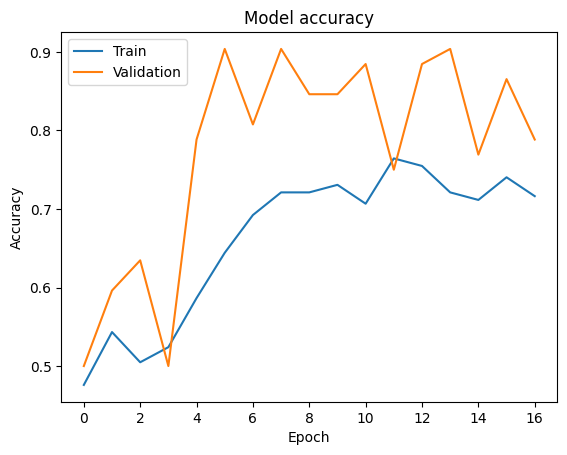

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

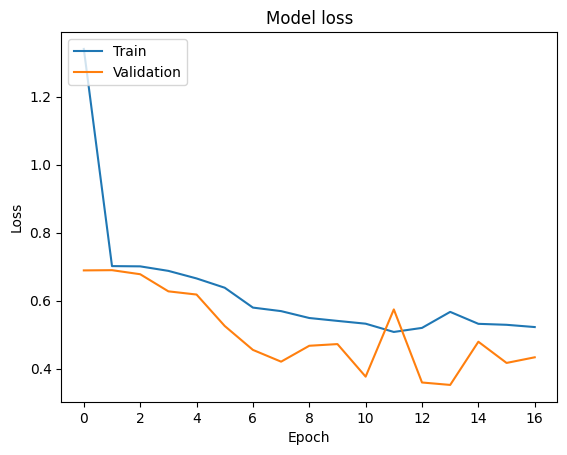

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()